In [187]:
import numpy as np
pd.set_option('display.max_rows',None)
import pandas as pd
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [189]:
train = pd.read_csv("C:\\Users\\roktim\Downloads\\ML\\logit\\titanic_x_y_train.csv",delimiter=",")


In [190]:
train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.050,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S,0


In [191]:
train.isnull()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,True,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,True,False,False
5,False,False,False,False,False,False,False,False,True,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,True,False,False
8,False,False,False,True,False,False,False,False,True,False,False
9,False,False,False,False,False,False,False,False,True,False,False


<AxesSubplot:>

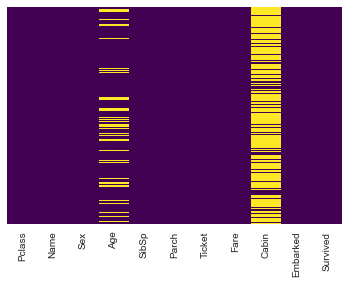

In [192]:
sns.heatmap(train.isnull(),yticklabels= False,cbar = False,cmap = 'viridis')

In [193]:
sns.set_style('whitegrid') 

<AxesSubplot:xlabel='Survived', ylabel='count'>

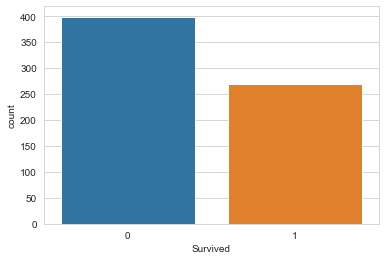

In [194]:
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

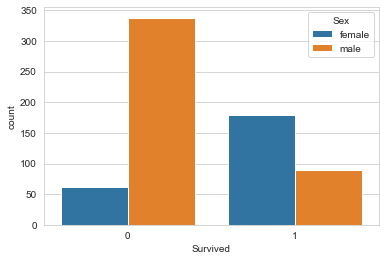

In [195]:
sns.countplot(x='Survived',hue='Sex',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

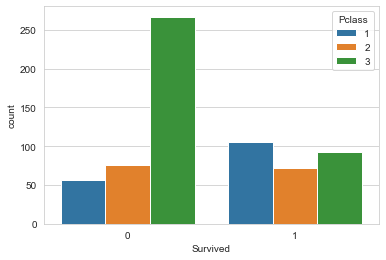

In [196]:
sns.countplot(x='Survived',hue='Pclass',data=train)

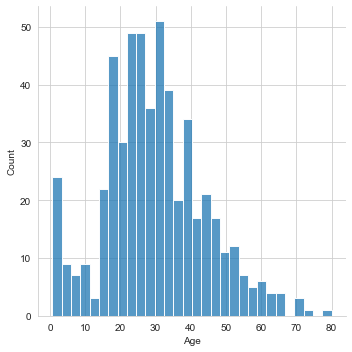

In [197]:
sns.displot(train['Age'].dropna(),kde=False,bins=30)

In [198]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    668 non-null    int64  
 1   Name      668 non-null    object 
 2   Sex       668 non-null    object 
 3   Age       536 non-null    float64
 4   SibSp     668 non-null    int64  
 5   Parch     668 non-null    int64  
 6   Ticket    668 non-null    object 
 7   Fare      668 non-null    float64
 8   Cabin     154 non-null    object 
 9   Embarked  667 non-null    object 
 10  Survived  668 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 57.5+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

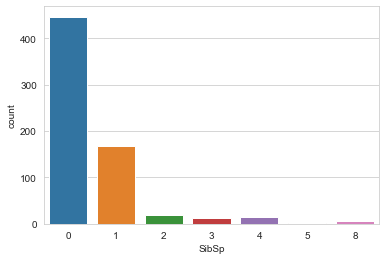

In [199]:
#SibSp is the feature which tell if these passengers have siblings or spouse on board
sns.countplot(x='SibSp',data=train) #people who are travelling are on their own

<AxesSubplot:>

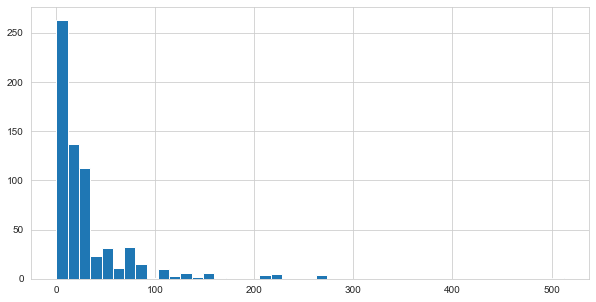

In [200]:
train['Fare'].hist(bins=45,figsize=(10,5))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

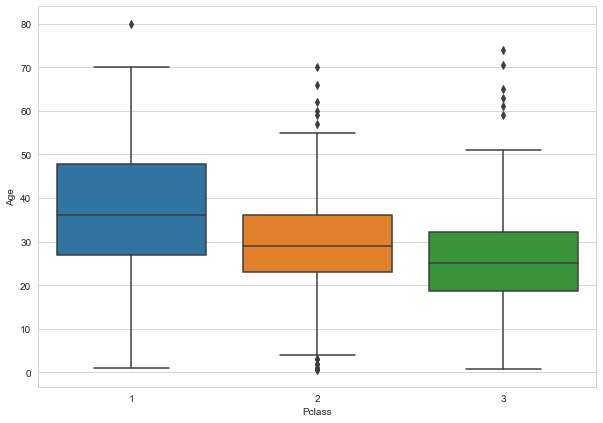

In [201]:
#average age by passenger class
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [202]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass== 2:
            return 29
        else:
            return 24
    else:
        return Age

In [203]:
train['Age']= train[['Age','Pclass']].apply(impute_age,axis=1)

In [204]:
sns.heatmap

<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

<AxesSubplot:>

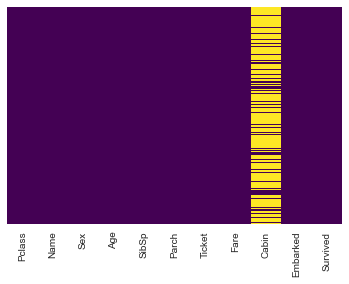

In [205]:
sns.heatmap(train.isnull(),yticklabels= False,cbar = False,cmap = 'viridis')

In [206]:
train.drop('Cabin',axis =1,inplace = True)

In [207]:
train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.000,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,24.0,0,0,A/5 2466,8.050,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.000,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,S,0


In [208]:
pd.get_dummies(train['Sex'])


,female,male
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1
5,0,1
6,1,0
7,0,1
8,0,1
9,0,1


In [209]:
sex =pd.get_dummies(train['Sex'],drop_first=True)
sex

,male
0,0
1,1
2,1
3,0
4,1
5,1
6,0
7,1
8,1
9,1


In [210]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [211]:
train = pd.concat([train,sex,embark],axis=1)

In [212]:
train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,male,Q,S
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.000,S,1,0,0,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,24.0,0,0,A/5 2466,8.050,S,0,1,0,1
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.000,S,0,1,0,1
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,S,0,0,0,1
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,S,0,1,0,1


In [213]:
train.drop(['Sex','Name','Ticket','Embarked'],axis=1,inplace=True)

In [214]:
train.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,male,Q,S
0,2,29.0,1,0,26.000,1,0,0,1
1,3,24.0,0,0,8.050,0,1,0,1
2,2,39.0,0,0,26.000,0,1,0,1
3,3,29.0,0,4,21.075,0,0,0,1
4,3,25.0,0,0,7.050,0,1,0,1


In [215]:
test = pd.read_csv("C:\\Users\\roktim\Downloads\\ML\\logit\\titanic_x_test.csv",delimiter=",")

In [216]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,"Davies, Master. John Morgan Jr",male,8.00,1,1,C.A. 33112,36.7500,NaN,S
1,1,"Leader, Dr. Alice (Farnham)",female,49.00,0,0,17465,25.9292,D17,S
2,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q
3,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.00,2,1,243847,27.0000,NaN,S
4,1,"McGough, Mr. James Robert",male,36.00,0,0,PC 17473,26.2875,E25,S
5,1,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C
6,3,"de Pelsmaeker, Mr. Alfons",male,16.00,0,0,345778,9.5000,NaN,S
7,3,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q
8,3,"Pettersson, Miss. Ellen Natalia",female,18.00,0,0,347087,7.7750,NaN,S
9,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,8.6625,NaN,S


In [217]:
def impute_age1(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass== 2:
            return 29
        else:
            return 24
    else:
        return Age

In [218]:
test['Age']= test[['Age','Pclass']].apply(impute_age1,axis=1)

<AxesSubplot:>

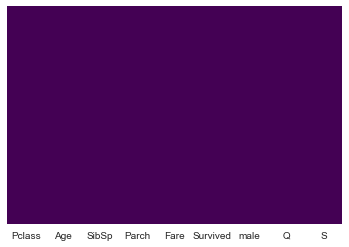

In [219]:
sns.heatmap(train.isnull(),yticklabels= False,cbar = False,cmap = 'viridis')

In [220]:
sex =pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)
test = pd.concat([test,sex,embark],axis=1)

In [221]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
0,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S,1,0,1
1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,0,0,1
2,3,"Kilgannon, Mr. Thomas J",male,24.0,0,0,36865,7.7375,NaN,Q,1,1,0
3,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S,0,0,1
4,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S,1,0,1


In [222]:
test.drop(['Cabin'],axis=1,inplace=True)

In [223]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,S,1,0,1
1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,S,0,0,1
2,3,"Kilgannon, Mr. Thomas J",male,24.0,0,0,36865,7.7375,Q,1,1,0
3,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,S,0,0,1
4,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,S,1,0,1


In [236]:

test.drop(['Name'],axis=1,inplace=True)

In [237]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,2,8.0,1,1,36.7500,1,0,1
1,1,49.0,0,0,25.9292,0,0,1
2,3,24.0,0,0,7.7375,1,1,0
3,2,24.0,2,1,27.0000,0,0,1
4,1,36.0,0,0,26.2875,1,0,1


In [238]:
x= train.drop('Survived',axis=1) 
y= train['Survived']

In [239]:
print(x.shape)
print(y.shape)
print(x.shape)
print(y.shape)

(668, 8)
(668,)
(668, 8)
(668,)


In [240]:
y

0      1
1      0
2      0
3      0
4      0
5      0
6      1
7      0
8      1
9      0
10     1
11     0
12     0
13     0
14     1
15     0
16     1
17     0
18     0
19     1
20     0
21     0
22     1
23     0
24     1
25     0
26     0
27     0
28     0
29     0
30     1
31     0
32     0
33     1
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     1
44     0
45     0
46     1
47     0
48     0
49     0
50     1
51     1
52     0
53     1
54     0
55     1
56     0
57     0
58     0
59     1
60     0
61     1
62     0
63     1
64     1
65     1
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     1
76     1
77     1
78     1
79     1
80     1
81     0
82     1
83     0
84     1
85     0
86     0
87     1
88     0
89     0
90     0
91     1
92     1
93     1
94     0
95     0
96     1
97     0
98     0
99     1
100    1
101    1
102    0
103    1
104    0
105    0
106    0
107    0
108    1
109    0
110    0
1

In [241]:
from sklearn.linear_model import LogisticRegression

In [242]:
Logit = LogisticRegression()

In [243]:
Logit.fit(x,y)

C:\Users\roktim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [245]:
pred = Logit.predict(test)
print(pred)

[0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1
 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0
 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1
 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0
 0]


In [164]:
from sklearn.metrics import classification_report

In [249]:
np.savetxt(X=pred, delimiter=',', fname='titanic_predicted.csv', fmt='%.0f')

In [166]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       117
           1       0.74      0.73      0.73        84

    accuracy                           0.78       201
   macro avg       0.78      0.77      0.77       201
weighted avg       0.78      0.78      0.78       201



In [172]:
from sklearn.metrics import confusion_matrix

In [175]:
pd.DataFrame(confusion_matrix(ytest,pred),columns= ['Pred No','Pred Yes'],index= ['Actual No','Actual Yes'])

,Pred No,Pred Yes
Actual No,96,21
Actual Yes,23,61


In [167]:
Logit.score(xtest, ytest)

0.7810945273631841

In [171]:
np.savetxt(X=pred, delimiter=',', fname='titanic predicted.csv', fmt='%.0f')